In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv


In [50]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


# Train-Test Splitting and Hyper-parameter Tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, loguniform, randint

# Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer



In [51]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

df_visits = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Programs/Cinema-Audience-Forecasting/Cinema-Audiance/dataset/booknow_visits/booknow_visits.csv")
df_relation = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Programs/Cinema-Audience-Forecasting/Cinema-Audiance/dataset/movie_theater_id_relation/movie_theater_id_relation.csv")
df_date = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Programs/Cinema-Audience-Forecasting/Cinema-Audiance/dataset/date_info/date_info.csv")
df_book_theaters = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Programs/Cinema-Audience-Forecasting/Cinema-Audiance/dataset/booknow_theaters/booknow_theaters.csv")
df_cine_booking = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Programs/Cinema-Audience-Forecasting/Cinema-Audiance/dataset/cinePOS_booking/cinePOS_booking.csv")
df_cine_theaters = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Programs/Cinema-Audience-Forecasting/Cinema-Audiance/dataset/cinePOS_theaters/cinePOS_theaters.csv")
df_book_booking = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Programs/Cinema-Audience-Forecasting/Cinema-Audiance/dataset/booknow_booking/booknow_booking.csv")

EDA

In [52]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214046 entries, 0 to 214045
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   book_theater_id  214046 non-null  object
 1   show_date        214046 non-null  object
 2   audience_count   214046 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.9+ MB


In [53]:
df_visits.head()

,book_theater_id,show_date,audience_count
0,book_00001,2023-01-13,50
1,book_00001,2023-01-14,64
2,book_00001,2023-01-15,58
3,book_00001,2023-01-16,44
4,book_00001,2023-01-18,12


In [54]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   show_date    547 non-null    object
 1   day_of_week  547 non-null    object
dtypes: object(2)
memory usage: 8.7+ KB


In [55]:
df_date.head()

,show_date,day_of_week
0,2023-01-01,Sunday
1,2023-01-02,Monday
2,2023-01-03,Tuesday
3,2023-01-04,Wednesday
4,2023-01-05,Thursday


In [56]:
df_relation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   book_theater_id  150 non-null    object
 1   cine_theater_id  150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [57]:
df_relation.head()


,book_theater_id,cine_theater_id
0,book_00509,cinePOS_01261
1,book_00063,cinePOS_02467
2,book_00054,cinePOS_08923
3,book_00094,cinePOS_02479
4,book_00052,cinePOS_06750


In [58]:
df_book_theaters.info()
df_book_theaters.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book_theater_id  314 non-null    object 
 1   theater_type     829 non-null    object 
 2   theater_area     829 non-null    object 
 3   latitude         829 non-null    float64
 4   longitude        829 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


,book_theater_id,theater_type,theater_area,latitude,longitude
0,book_00093,Drama,Area_001,22.619233,78.113017
1,book_00078,Drama,Area_001,22.619233,78.113017
2,book_00291,Drama,Area_001,22.619233,78.113017
3,book_00258,Drama,Area_001,22.619233,78.113017
4,book_00212,Drama,Area_002,23.004410,79.934515


In [59]:
df_cine_booking.info()
df_cine_booking.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641966 entries, 0 to 1641965
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   cine_theater_id   1641966 non-null  object
 1   show_datetime     1641966 non-null  object
 2   booking_datetime  1641966 non-null  object
 3   tickets_sold      1641966 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 50.1+ MB


,cine_theater_id,show_datetime,booking_datetime,tickets_sold
0,cinePOS_00001,2023-01-01 11:00:00,2023-01-01 09:00:00,1
1,cinePOS_00002,2023-01-01 13:00:00,2023-01-01 06:00:00,3
2,cinePOS_00003,2023-01-01 16:00:00,2023-01-01 14:00:00,2
3,cinePOS_00004,2023-01-01 17:00:00,2023-01-01 11:00:00,5
4,cinePOS_00005,2023-01-01 17:00:00,2023-01-01 03:00:00,13


In [60]:
df_cine_theaters.info()
df_cine_theaters.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cine_theater_id  4690 non-null   object 
 1   theater_type     4690 non-null   object 
 2   theater_area     4690 non-null   object 
 3   latitude         829 non-null    float64
 4   longitude        829 non-null    float64
dtypes: float64(2), object(3)
memory usage: 183.3+ KB


,cine_theater_id,theater_type,theater_area,latitude,longitude
0,cinePOS_05466,Other,Area_104,22.619233,78.113017
1,cinePOS_08708,Other,Area_104,22.619233,78.113017
2,cinePOS_00753,Other,Area_104,22.619233,78.113017
3,cinePOS_05776,Other,Area_104,22.619233,78.113017
4,cinePOS_07536,Other,Area_104,23.004410,79.934515


In [61]:
df_book_booking.info()
df_book_booking.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68336 entries, 0 to 68335
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_theater_id   68336 non-null  object
 1   show_datetime     68336 non-null  object
 2   booking_datetime  68336 non-null  object
 3   tickets_booked    68336 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.1+ MB


,book_theater_id,show_datetime,booking_datetime,tickets_booked
0,book_00244,2023-01-01 19:00:00,2023-01-01 16:00:00,1
1,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,3
2,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,6
3,book_00244,2023-01-01 20:00:00,2023-01-01 16:00:00,2
4,book_00151,2023-01-01 20:00:00,2023-01-01 01:00:00,5


The entire goal of this project is to predict the Audience Count at various theaters on specific show dates. They have given 6 datasets

1. Based on the above, df analysis, the following seems to be the dataframes and the relationship with each other

df_visits (booknow_visits): This is the central file. It contains the target variable, audience_count (Numerical). Everything else gets attached to this file using the keys book_theater_id and show_date.

3. Booking Data (The Primary Features)
df_book_booking (booknow_booking) and df_cine_booking (cinePOS_booking):

These two files hold all the raw ticket sales data (tickets_booked/tickets_sold). We need to combine them into a single list of transactions, and then aggregate this list by theater and date to create our main Numerical input features, such as total_booked and booking_count.

5. Bridge and Metadata (The Supporting Details)
df_relation (movie_theater_id_relation): This file connects the IDs used in the two separate booking systems (book_theater_id and cine_theater_id) so we can correctly combine the ticket sales from both sources for the same physical location.

df_date (date_info): This file provides temporal context using show_date. Its main feature, day_of_week, is Categorical and helps us identify patterns like weekend attendance.

df_book_theaters (booknow_theaters): This file provides essential physical details about each theater using book_theater_id. It includes Categorical features like theater_type and theater_area, and Numerical features like latitude and longitude. In the question, it is mentioned, lat and long may not be that accurate and can be ignored. We have to check during trainign phase if the accuracy is impacted by this

Summary of what needs to be done
We first clean and merge the raw booking transactions (df_book_booking and df_cine_booking using df_relation) to get daily, aggregated ticket numbers. Then, we need to take these aggregated booking numbers, plus the date info (df_date) and the theater details (df_book_theaters), and join them all onto the central visit table based on the matching theater ID and show date. This will be the base for modelling

**REMOVE DUPLICATES FROM THE DATA FRAME**

In [62]:
print("\n--- Duplicate Check (Raw Files) ---")
# Check for full-row duplicates in all loaded dataframes before cleaning
print(f"df_visits duplicates: {df_visits.duplicated().sum()}")
print(f"df_date duplicates: {df_date.duplicated().sum()}")
print(f"df_relation duplicates: {df_relation.duplicated().sum()}")
print(f"df_cine_booking duplicates: {df_cine_booking.duplicated().sum()}")
print(f"df_book_booking duplicates: {df_book_booking.duplicated().sum()}")
print(f"df_cine_theaters duplicates: {df_cine_theaters.duplicated().sum()}")
print(f"df_book_theaters duplicates: {df_book_theaters.duplicated().sum()}")
print("-----------------------------------")



--- Duplicate Check (Raw Files) ---
df_visits duplicates: 10
df_date duplicates: 0
df_relation duplicates: 0
df_cine_booking duplicates: 12541
df_book_booking duplicates: 2042
df_cine_theaters duplicates: 0
df_book_theaters duplicates: 354
-----------------------------------
df_cine_booking duplicates: 12541
df_book_booking duplicates: 2042
df_cine_theaters duplicates: 0
df_book_theaters duplicates: 354
-----------------------------------


In [63]:

df_cine_booking.drop_duplicates(inplace=True)
df_book_booking.drop_duplicates(inplace=True)

print(f"df_visits duplicates: {df_visits.duplicated().sum()}")
print(f"df_date duplicates: {df_date.duplicated().sum()}")
print(f"df_relation duplicates: {df_relation.duplicated().sum()}")
print(f"df_cine_booking duplicates: {df_cine_booking.duplicated().sum()}")
print(f"df_book_booking duplicates: {df_book_booking.duplicated().sum()}")
print(f"df_cine_theaters duplicates: {df_cine_theaters.duplicated().sum()}")
print(f"df_book_theaters duplicates: {df_book_theaters.duplicated().sum()}")

df_visits duplicates: 10
df_date duplicates: 0
df_relation duplicates: 0
df_cine_booking duplicates: 0
df_book_booking duplicates: 0
df_cine_theaters duplicates: 0
df_book_theaters duplicates: 354
df_cine_booking duplicates: 0
df_book_booking duplicates: 0
df_cine_theaters duplicates: 0
df_book_theaters duplicates: 354


**Find Outliers in all dataframes**

In [64]:
def find_outliers_and_report(df, df_name):
    print(f"\n--- Outlier Analysis for {df_name} (using IQR) ---")
    
    numeric_cols = df.select_dtypes(include=np.number).columns
    
    if numeric_cols.empty:
        print("No numeric columns found.")
        return

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        total_count = len(df)
        
        if outlier_count > 0:
            percentage = (outlier_count / total_count) * 100
            print(f"  {col}: {outlier_count} outliers found ({percentage:.2f}%)")
        else:
            print(f"  {col}: No outliers found.")
    print("-" * 40)
    
find_outliers_and_report(df_visits, 'df_visits')
find_outliers_and_report(df_date, 'df_date')
find_outliers_and_report(df_relation, 'df_relation')
find_outliers_and_report(df_cine_booking, 'df_cine_booking')
find_outliers_and_report(df_book_booking, 'df_book_booking')
find_outliers_and_report(df_cine_theaters, 'df_cine_theaters')
find_outliers_and_report(df_book_theaters, 'df_book_theaters')


--- Outlier Analysis for df_visits (using IQR) ---
  audience_count: 5589 outliers found (2.61%)
----------------------------------------

--- Outlier Analysis for df_date (using IQR) ---
No numeric columns found.

--- Outlier Analysis for df_relation (using IQR) ---
No numeric columns found.

--- Outlier Analysis for df_cine_booking (using IQR) ---
  tickets_sold: 100015 outliers found (6.14%)
----------------------------------------

--- Outlier Analysis for df_book_booking (using IQR) ---
  tickets_booked: 5523 outliers found (8.33%)
----------------------------------------

--- Outlier Analysis for df_cine_theaters (using IQR) ---
  latitude: 77 outliers found (1.64%)
  longitude: No outliers found.
----------------------------------------

--- Outlier Analysis for df_book_theaters (using IQR) ---
  latitude: 77 outliers found (9.29%)
  longitude: No outliers found.
----------------------------------------


REMOVE THE OUTLIERS IN ALL DATAFRAMES

In [65]:
def cap_outliers_iqr(df):
    
    numeric_cols = df.select_dtypes(include=np.number).columns
    
    if numeric_cols.empty:
        print("No numeric columns found.")
        return

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

    return df

df_visits = cap_outliers_iqr(df_visits)
df_cine_booking = cap_outliers_iqr(df_cine_booking)
df_book_booking = cap_outliers_iqr(df_book_booking)
df_book_theaters = cap_outliers_iqr(df_book_theaters)
df_book_theaters = cap_outliers_iqr(df_book_theaters)

Consolidate all Booking data into one dataframe

In [66]:
df_cine_booking['tickets'] = df_cine_booking['tickets_sold']
df_cine_booking['theater_id'] = df_cine_booking['cine_theater_id']
df_cine_booking['show_dt'] = df_cine_booking['show_datetime']
df_cine_booking['booking_dt'] = df_cine_booking['booking_datetime']

df_book_booking['tickets'] = df_book_booking['tickets_booked']
df_book_booking['theater_id'] = df_book_booking['book_theater_id']
df_book_booking['show_dt'] = df_book_booking['show_datetime']
df_book_booking['booking_dt'] = df_book_booking['booking_datetime']

df_all_booking = pd.concat([
    df_cine_booking[['theater_id', 'show_dt', 'booking_dt', 'tickets']], 
    df_book_booking[['theater_id', 'show_dt', 'booking_dt', 'tickets']]
], ignore_index=True)

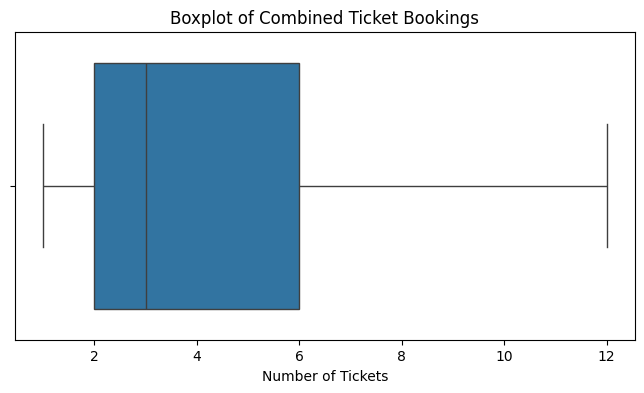

In [67]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_all_booking['tickets'])
plt.title('Boxplot of Combined Ticket Bookings')
plt.xlabel('Number of Tickets')
plt.show()

In [68]:
print("Starting Feature Engineering...")

# --- 2. DATA CLEANING AND FEATURE ENGINEERING ---

# Build mapping from cine_theater_id -> book_theater_id so we can normalize IDs
cine_to_book_map = (
    df_relation.set_index("cine_theater_id")["book_theater_id"].to_dict()
)

# 2.2 Booking Data Aggregation

# Ensure datetime
df_all_booking["show_dt"] = pd.to_datetime(df_all_booking["show_dt"], errors="coerce")
df_all_booking["booking_dt"] = pd.to_datetime(df_all_booking["booking_dt"], errors="coerce")

# Drop invalid rows
df_all_booking = df_all_booking.dropna(subset=["show_dt", "booking_dt"]).copy()

# Derive date and booking lags
df_all_booking["show_date"] = df_all_booking["show_dt"].dt.normalize()

df_all_booking["booking_lag_hours"] = (
    (df_all_booking["show_dt"] - df_all_booking["booking_dt"]).dt.total_seconds() / 3600
)
df_all_booking["booking_lag_days"] = df_all_booking["booking_lag_hours"] / 24

# Keep only non-negative lags (ignore late/dirty rows)
df_all_booking = df_all_booking[df_all_booking["booking_lag_hours"] >= 0].copy()

# Aggregate per theater per show_date
booking_features = (
    df_all_booking.groupby(["theater_id", "show_date"]).agg(
        total_booked=("tickets", "sum"),
        mean_booked=("tickets", "mean"),
        median_lag_days=("booking_lag_days", "median"),
        booking_count=("tickets", "count"),
    )
    .reset_index()
)

# Normalize theater_id to BookNow ID using the mapping (cine -> book); if already book IDs, keep as-is
mapped_ids = booking_features["theater_id"].map(cine_to_book_map)
booking_features["book_theater_id"] = mapped_ids.fillna(booking_features["theater_id"]).astype(str)
booking_features = booking_features.drop(columns=["theater_id"]).copy()

# 2.3 Core Visits Data Preparation

# Prepare target and types (do this BEFORE merging to avoid conflicts)
df_visits = df_visits.rename(columns={"audience_count": "target"})
df_visits["book_theater_id"] = df_visits["book_theater_id"].astype(str)

# Ensure datetime for joins
df_visits["show_date"] = pd.to_datetime(df_visits["show_date"]) 
df_date["show_date"] = pd.to_datetime(df_date["show_date"]) 
booking_features["show_date"] = pd.to_datetime(booking_features["show_date"]) 

# 2.4 Merging All Features

df_visits = pd.merge(df_visits, df_date, on="show_date", how="left")

# Ensure theater ids are consistent types before merge
if df_book_theaters["book_theater_id"].dtype != object:
    df_book_theaters["book_theater_id"] = df_book_theaters["book_theater_id"].astype(str)

cols_meta = ["book_theater_id", "theater_type", "theater_area", "latitude", "longitude"]
df_visits = pd.merge(
    df_visits, 
    df_book_theaters[cols_meta], 
    on="book_theater_id", 
    how="left",
)

# Merge booking aggregates
df_visits = pd.merge(
    df_visits, booking_features, on=["book_theater_id", "show_date"], how="left"
)

# --- 3. COMPREHENSIVE IMPUTATION ---

fill_cols = ["total_booked", "mean_booked", "median_lag_days", "booking_count"]
for col in fill_cols:
    if col in df_visits.columns:
        df_visits[col] = df_visits[col].fillna(0)

if "latitude" in df_visits.columns:
    df_visits["latitude"] = df_visits["latitude"].fillna(df_visits["latitude"].mean())
if "longitude" in df_visits.columns:
    df_visits["longitude"] = df_visits["longitude"].fillna(df_visits["longitude"].mean())

for c in ["theater_type", "theater_area"]:
    if c in df_visits.columns:
        df_visits[c] = df_visits[c].fillna("Missing")

# --- 4. FEATURE CREATION & TRAIN/TEST SPLIT ---

# Time features
df_visits["year"] = df_visits["show_date"].dt.year
df_visits["month"] = df_visits["show_date"].dt.month
df_visits["day"] = df_visits["show_date"].dt.day
df_visits["week_of_year"] = df_visits["show_date"].dt.isocalendar().week.astype(int)

# Weekend flag (robust if day_of_week present as string)
if "day_of_week" in df_visits.columns:
    df_visits["is_weekend"] = df_visits["day_of_week"].isin(["Saturday", "Sunday"]).astype(int)
else:
    df_visits["is_weekend"] = (df_visits["show_date"].dt.weekday >= 5).astype(int)

# --- HISTORICAL PRIORS (computed from full data before split) ---
# These give the model a learned baseline per theater/day even when bookings are zero

# Overall theater mean
theater_stats = df_visits.groupby("book_theater_id")["target"].mean().rename("theater_mean")
df_visits = df_visits.merge(theater_stats, on="book_theater_id", how="left")

# Theater × day_of_week mean (requires day_of_week column)
if "day_of_week" in df_visits.columns:
    theater_dow_stats = (
        df_visits.groupby(["book_theater_id", "day_of_week"])["target"]
        .mean()
        .rename("theater_dow_mean")
    )
    df_visits = df_visits.merge(theater_dow_stats, on=["book_theater_id", "day_of_week"], how="left")
    # Fill missing combos with theater mean (check if column exists first)
    if "theater_dow_mean" in df_visits.columns:
        df_visits["theater_dow_mean"] = df_visits["theater_dow_mean"].fillna(df_visits["theater_mean"])
    else:
        df_visits["theater_dow_mean"] = df_visits["theater_mean"]
else:
    df_visits["theater_dow_mean"] = df_visits["theater_mean"]

# Fill any remaining NaNs in priors with global mean
global_mean = df_visits["target"].mean()
if "theater_mean" in df_visits.columns:
    df_visits["theater_mean"] = df_visits["theater_mean"].fillna(global_mean)
else:
    df_visits["theater_mean"] = global_mean
    
if "theater_dow_mean" in df_visits.columns:
    df_visits["theater_dow_mean"] = df_visits["theater_dow_mean"].fillna(global_mean)
else:
    df_visits["theater_dow_mean"] = global_mean

# Cap outliers AFTER all merges and feature creation
df_visits = cap_outliers_iqr(df_visits)

# Build a canonical ID for evaluation/submission later
# ID format: book_theater_id_YYYY-MM-DD
df_visits["ID"] = (
    df_visits["book_theater_id"].astype(str)
    + "_"
    + df_visits["show_date"].dt.strftime("%Y-%m-%d")
)

# Time-based split: last 2 months as hold-out
split_date = df_visits["show_date"].max() - pd.DateOffset(months=2)
train_df = df_visits[df_visits["show_date"] <= split_date].copy()
test_df = df_visits[df_visits["show_date"] > split_date].copy()

# Optional downsample train for speed
train_df = train_df.sample(frac=0.1, random_state=42).copy() if len(train_df) > 0 else train_df

# Features/target
X_train = train_df.drop(columns=["target", "show_date", "ID"], errors="ignore")
y_train = train_df["target"]
X_test = test_df.drop(columns=["target", "show_date", "ID"], errors="ignore")
# Keep IDs for submission
test_ids = test_df["ID"].values

print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")
print(f"Historical features added: theater_mean, theater_dow_mean, week_of_year")
print(f"X_train columns: {X_train.columns.tolist()}")


Starting Feature Engineering...
Train set size: 17564, Test set size: 42700
Historical features added: theater_mean, theater_dow_mean, week_of_year
X_train columns: ['book_theater_id', 'day_of_week', 'theater_type', 'theater_area', 'latitude', 'longitude', 'total_booked', 'mean_booked', 'median_lag_days', 'booking_count', 'year', 'month', 'day', 'week_of_year', 'is_weekend', 'theater_mean', 'theater_dow_mean']
Train set size: 17564, Test set size: 42700
Historical features added: theater_mean, theater_dow_mean, week_of_year
X_train columns: ['book_theater_id', 'day_of_week', 'theater_type', 'theater_area', 'latitude', 'longitude', 'total_booked', 'mean_booked', 'median_lag_days', 'booking_count', 'year', 'month', 'day', 'week_of_year', 'is_weekend', 'theater_mean', 'theater_dow_mean']


In [69]:
numerical_features = ['latitude', 'longitude', 'total_booked', 'mean_booked', 'median_lag_days', 
                      'booking_count', 'year', 'month', 'day', 'week_of_year', 'is_weekend',
                      'theater_mean', 'theater_dow_mean']
categorical_ohe = ['theater_type', 'theater_area', 'day_of_week']

# Use TargetEncoder for high-cardinality theater IDs to avoid all-zeros for unseen IDs
te_kwargs = dict(min_samples_leaf=10, smoothing=5.0, handle_unknown='value', handle_missing='value')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [f for f in numerical_features if f != 'is_weekend']),
        ('bin', 'passthrough', ['is_weekend']),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_ohe),
        ('id_te', TargetEncoder(**te_kwargs), ['book_theater_id'])
    ],
    remainder='drop'
)


Let's try different Regressors here and see which one works best for the training model

In [70]:

model = RandomForestRegressor(
    n_estimators=50,             # 150?
    max_depth=10,                # 15?
    min_samples_leaf=10,         # 5 or 10?
    random_state=42, 
    n_jobs=-1
)

full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', model)])

print("Training model...")

Training model...


**Let's run the MODEL now**

In [71]:
import time
start_time = time.time() 
full_pipeline.fit(X_train, y_train)
end_time = time.time() 
print(f"Training Complete. Duration: {end_time - start_time:.2f} seconds")

Training Complete. Duration: 0.44 seconds


**Let's do the prediction now with test dataset**

In [72]:
# Peek at features after preprocessing split
X_test.head()

,book_theater_id,day_of_week,theater_type,theater_area,latitude,longitude,total_booked,mean_booked,median_lag_days,booking_count,year,month,day,week_of_year,is_weekend,theater_mean,theater_dow_mean
291,book_00001,Friday,Drama,Area_002,22.865377,78.929514,0.0,0.0,0.0,0.0,2023.0,12.0,29.0,52.0,0.0,47.046784,43.719298
292,book_00001,Friday,Drama,Area_002,22.865377,78.929514,0.0,0.0,0.0,0.0,2023.0,1.0,5.0,1.0,0.0,47.046784,43.719298
293,book_00001,Saturday,Drama,Area_002,22.865377,78.929514,0.0,0.0,0.0,0.0,2023.0,1.0,6.0,1.0,1.0,47.046784,66.771930
294,book_00001,Sunday,Drama,Area_002,22.865377,78.929514,0.0,0.0,0.0,0.0,2023.0,1.0,7.0,1.0,1.0,47.046784,59.758621
295,book_00001,Wednesday,Drama,Area_002,22.865377,78.929514,0.0,0.0,0.0,0.0,2023.0,1.0,10.0,2.0,0.0,47.046784,38.618182


In [73]:
y_pred = full_pipeline.predict(X_test)

# Post-process: non-negative integer counts
y_pred = np.maximum(0, y_pred)
y_pred = np.round(y_pred).astype(int)

# Build submission with required columns: ID, audience_count
submission_df = pd.DataFrame({
    "ID": test_ids,
    "audience_count": y_pred,
})

submission_df.to_csv("submission.csv", index=False)

print("\n--- Submission Summary ---")
print("Submission file 'submission.csv' created successfully.")
print(f"Test predictions generated for {len(y_pred)} rows.")
print(f"Sample Submission Data:\n{submission_df.head()}")


--- Submission Summary ---
Submission file 'submission.csv' created successfully.
Test predictions generated for 42700 rows.
Sample Submission Data:
                      ID  audience_count
0  book_00001_2023-12-29              51
1  book_00001_2024-01-05              43
2  book_00001_2024-01-06              55
3  book_00001_2024-01-07              57
4  book_00001_2024-01-10              45


In [74]:
submission_df

,ID,audience_count
0,book_00001_2023-12-29,51
1,book_00001_2024-01-05,43
2,book_00001_2024-01-06,55
3,book_00001_2024-01-07,57
4,book_00001_2024-01-10,45
...,...,...
42695,book_00829_2024-02-23,11
42696,book_00829_2024-02-24,13
42697,book_00829_2024-02-25,12
42698,book_00829_2024-02-27,10


## Build Kaggle submission for official IDs


We will:


- Load `sample_submission.csv` (the list of required IDs).


- Parse `ID` into `book_theater_id` and `show_date`.


- Join calendar (`df_date`), theater metadata (`df_book_theaters`), and daily booking aggregates (`booking_features`).


- Engineer the same features used in training and predict with the trained pipeline.


- Save `submission_kaggle.csv` with columns `ID` and `audience_count`.

In [75]:
# Load sample_submission and build features for those IDs
from pathlib import Path
SAMPLE_PATH = r"C:/Users/Lenovo/Desktop/Python/Programs/Cinema-Audience-Forecasting/Cinema-Audiance/dataset/sample_submission/sample_submission.csv"
df_sample = pd.read_csv(SAMPLE_PATH)


# Parse ID -> book_theater_id and show_date (YYYY-MM-DD)


parts = df_sample['ID'].astype(str).str.rsplit('_', n=1, expand=True)
df_sample['book_theater_id'] = parts[0].astype(str)
df_sample['show_date'] = pd.to_datetime(parts[1], errors='coerce')


# Base feature frame using sample IDs (preserve order)
feat = df_sample[['ID', 'book_theater_id', 'show_date']].copy()

# Calendar merge
df_date['show_date'] = pd.to_datetime(df_date['show_date'])
feat = feat.merge(df_date, on='show_date', how='left')

# Theater metadata merge (ensure consistent dtype)
if df_book_theaters['book_theater_id'].dtype != object:
    df_book_theaters['book_theater_id'] = df_book_theaters['book_theater_id'].astype(str)
feat = feat.merge(
    df_book_theaters[['book_theater_id','theater_type','theater_area','latitude','longitude']],
    on='book_theater_id', how='left'
)

# Booking features merge (use the aggregates we prepared earlier)
booking_features_temp = booking_features.copy()
booking_features_temp['show_date'] = pd.to_datetime(booking_features_temp['show_date'])
feat = feat.merge(booking_features_temp, on=['book_theater_id','show_date'], how='left')

# Imputations (match training-time logic)
for col in ['total_booked','mean_booked','median_lag_days','booking_count']:
    if col in feat.columns:
        feat[col] = feat[col].fillna(0)

if 'latitude' in feat.columns:
    feat['latitude'] = feat['latitude'].fillna(feat['latitude'].mean())
if 'longitude' in feat.columns:
    feat['longitude'] = feat['longitude'].fillna(feat['longitude'].mean())
for c in ['theater_type','theater_area']:
    if c in feat.columns:
        feat[c] = feat[c].fillna('Missing')


# Feature creation
feat['year'] = feat['show_date'].dt.year
feat['month'] = feat['show_date'].dt.month
feat['day'] = feat['show_date'].dt.day
feat['week_of_year'] = feat['show_date'].dt.isocalendar().week.astype(int)
if 'day_of_week' in feat.columns:
    feat['is_weekend'] = feat['day_of_week'].isin(['Saturday','Sunday']).astype(int)
else:
    feat['is_weekend'] = (feat['show_date'].dt.weekday >= 5).astype(int)

# Historical priors (use training data statistics)
theater_stats = df_visits.groupby('book_theater_id')['target'].mean().rename('theater_mean')
feat = feat.merge(theater_stats, on='book_theater_id', how='left')

if 'day_of_week' in feat.columns:
    theater_dow_stats = (
        df_visits.groupby(['book_theater_id', 'day_of_week'])['target']
        .mean()
        .rename('theater_dow_mean')
    )
    feat = feat.merge(theater_dow_stats, on=['book_theater_id', 'day_of_week'], how='left')
    feat['theater_dow_mean'] = feat['theater_dow_mean'].fillna(feat['theater_mean'])
else:
    feat['theater_dow_mean'] = feat['theater_mean']

# Fill any missing with global mean
global_mean = df_visits['target'].mean()
feat['theater_mean'] = feat['theater_mean'].fillna(global_mean)
feat['theater_dow_mean'] = feat['theater_dow_mean'].fillna(global_mean)

# Ensure types
feat['book_theater_id'] = feat['book_theater_id'].astype(str)


# Build X_submit consistent with training-time feature selection
X_submit = feat.drop(columns=['show_date','ID'], errors='ignore')

# Quick sanity check
feat.head()


,ID,book_theater_id,show_date,day_of_week,theater_type,theater_area,latitude,longitude,total_booked,mean_booked,median_lag_days,booking_count,year,month,day,week_of_year,is_weekend,theater_mean,theater_dow_mean
0,book_00001_2024-03-01,book_00001,2024-03-01,Friday,Drama,Area_002,23.00441,79.934515,0.0,0.0,0.0,0.0,2024,3,1,9,0,47.046784,43.719298
1,book_00001_2024-03-02,book_00001,2024-03-02,Saturday,Drama,Area_002,23.00441,79.934515,0.0,0.0,0.0,0.0,2024,3,2,9,1,47.046784,66.771930
2,book_00001_2024-03-03,book_00001,2024-03-03,Sunday,Drama,Area_002,23.00441,79.934515,0.0,0.0,0.0,0.0,2024,3,3,9,1,47.046784,59.758621
3,book_00001_2024-03-04,book_00001,2024-03-04,Monday,Drama,Area_002,23.00441,79.934515,0.0,0.0,0.0,0.0,2024,3,4,10,0,47.046784,19.600000
4,book_00001_2024-03-06,book_00001,2024-03-06,Wednesday,Drama,Area_002,23.00441,79.934515,0.0,0.0,0.0,0.0,2024,3,6,10,0,47.046784,38.618182


In [76]:
# Predict for sample_submission IDs and write Kaggle file
y_submit = full_pipeline.predict(X_submit)
y_submit = np.maximum(0, y_submit)
y_submit = np.round(y_submit).astype(int)
submission_kaggle = pd.DataFrame({
    'ID': df_sample['ID'],  # keep original order
    'audience_count': y_submit,
})
submission_kaggle.to_csv('submission_kaggle.csv', index=False)
print("Kaggle submission written to submission_kaggle.csv")
submission_kaggle.head()

Kaggle submission written to submission_kaggle.csv


,ID,audience_count
0,book_00001_2024-03-01,43
1,book_00001_2024-03-02,69
2,book_00001_2024-03-03,59
3,book_00001_2024-03-04,26
4,book_00001_2024-03-06,41


In [77]:
submission_kaggle

,ID,audience_count
0,book_00001_2024-03-01,43
1,book_00001_2024-03-02,69
2,book_00001_2024-03-03,59
3,book_00001_2024-03-04,26
4,book_00001_2024-03-06,41
...,...,...
38057,book_00829_2024-04-18,13
38058,book_00829_2024-04-19,10
38059,book_00829_2024-04-20,12
38060,book_00829_2024-04-21,11


## Predict for custom dates and theaters


Use the helper below to forecast `audience_count` for any list of (book_theater_id, show_date) rows.

- It rebuilds the same features (calendar, theater meta, bookings),

- Applies the same imputations and engineered fields, then

- Uses the trained `full_pipeline` to predict.

In [78]:
# Helper functions to build features and predict for arbitrary rows


def build_features_for_rows(rows_df: pd.DataFrame) -> tuple[pd.DataFrame, pd.Series]:


    """
    rows_df columns required: ['book_theater_id', 'show_date']
    Returns: (X_new, ids) where ids are 'book_theater_id_YYYY-MM-DD'
    """
    df = rows_df.copy()

    # Types and base ID

    df['book_theater_id'] = df['book_theater_id'].astype(str)
    df['show_date'] = pd.to_datetime(df['show_date'], errors='coerce')
    df['ID'] = df['book_theater_id'] + '_' + df['show_date'].dt.strftime('%Y-%m-%d')

    # Calendar merge (and fallback day_of_week if missing)
    df_merge = df.merge(df_date.assign(show_date=pd.to_datetime(df_date['show_date'])),
                        on='show_date', how='left')
    if 'day_of_week' not in df_merge.columns or df_merge['day_of_week'].isna().any():
        df_merge['day_of_week'] = df_merge['show_date'].dt.day_name()

    # Theater metadata

    meta = df_book_theaters.copy()
    if meta['book_theater_id'].dtype != object:
        meta['book_theater_id'] = meta['book_theater_id'].astype(str)
    cols_meta = ['book_theater_id','theater_type','theater_area','latitude','longitude']
    df_merge = df_merge.merge(meta[cols_meta], on='book_theater_id', how='left')

    # Booking aggregates (copy to preserve originals)

    bf = booking_features.copy()
    bf['show_date'] = pd.to_datetime(bf['show_date'])
    df_merge = df_merge.merge(bf, on=['book_theater_id','show_date'], how='left')

    # Imputations (mirror training)

    for col in ['total_booked','mean_booked','median_lag_days','booking_count']:
        if col in df_merge.columns:
            df_merge[col] = df_merge[col].fillna(0)

    if 'latitude' in df_merge.columns:
        df_merge['latitude'] = df_merge['latitude'].fillna(df_merge['latitude'].mean())
    if 'longitude' in df_merge.columns:
        df_merge['longitude'] = df_merge['longitude'].fillna(df_merge['longitude'].mean())
    for c in ['theater_type','theater_area']:
        if c in df_merge.columns:
            df_merge[c] = df_merge[c].fillna('Missing')

    # Engineered time features

    df_merge['year'] = df_merge['show_date'].dt.year
    df_merge['month'] = df_merge['show_date'].dt.month
    df_merge['day'] = df_merge['show_date'].dt.day
    df_merge['week_of_year'] = df_merge['show_date'].dt.isocalendar().week.astype(int)
    df_merge['is_weekend'] = df_merge['day_of_week'].isin(['Saturday','Sunday']).astype(int)

    # Historical priors (use pre-computed from training data)
    # Compute from df_visits which has the historical target data
    theater_stats = df_visits.groupby('book_theater_id')['target'].mean().rename('theater_mean')
    df_merge = df_merge.merge(theater_stats, on='book_theater_id', how='left')
    
    if 'day_of_week' in df_merge.columns:
        theater_dow_stats = (
            df_visits.groupby(['book_theater_id', 'day_of_week'])['target']
            .mean()
            .rename('theater_dow_mean')
        )
        df_merge = df_merge.merge(theater_dow_stats, on=['book_theater_id', 'day_of_week'], how='left')
        df_merge['theater_dow_mean'] = df_merge['theater_dow_mean'].fillna(df_merge['theater_mean'])
    else:
        df_merge['theater_dow_mean'] = df_merge['theater_mean']
    
    # Fill any missing with global mean
    global_mean = df_visits['target'].mean()
    df_merge['theater_mean'] = df_merge['theater_mean'].fillna(global_mean)
    df_merge['theater_dow_mean'] = df_merge['theater_dow_mean'].fillna(global_mean)

    # Ensure types

    df_merge['book_theater_id'] = df_merge['book_theater_id'].astype(str)

    # Build X consistent with training
    X_new = df_merge.drop(columns=['show_date','ID'], errors='ignore')
    ids = df_merge['book_theater_id'] + '_' + df_merge['show_date'].dt.strftime('%Y-%m-%d')
    return X_new, ids


def predict_for_rows(rows_df: pd.DataFrame) -> pd.DataFrame:
    X_new, ids = build_features_for_rows(rows_df)
    y_new = full_pipeline.predict(X_new)
    y_new = np.maximum(0, y_new)
    y_new = np.round(y_new).astype(int)
    return pd.DataFrame({'ID': ids, 'audience_count': y_new})


In [83]:
# Example: predict for two theaters one week after the last known date

# Pick two known theater IDs
sample_ids = (
    df_book_theaters['book_theater_id'].astype(str).dropna().unique().tolist()
)[:100]

# Choose a target date (7 days after the max date in df_visits)
target_date = pd.to_datetime("2023-01-20")
# for i in range(100):
new_rows = pd.DataFrame([
    {'book_theater_id': "book_00433", 'show_date': target_date}
])
custom_pred = predict_for_rows(new_rows)
print(custom_pred)

                      ID  audience_count
0  book_00433_2023-01-20              28
